IE6400 Foundations Data Analytics Engineering
Fall Semester 2023

#PROJECT 1 : Cleaning and Analyzing Crime Data

GROUP 25 : Hari Chandana Kannuru, Likitha Kukunarapu, Sri Likhitha Anuganti, Venkata Anantha Reddy Arikatla, Akilesh Reddy Katreddy

 **Tasks: 1. Data Acquisition:**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
missing_values = ["n.a.", "NA", "n/a", "na", 0]
df = pd.read_csv('/content/Crime_Data_from_2020_to_Present (1).csv', na_values = missing_values)


**2.Data Inspection**

In [29]:
# Display the first few rows of the dataset
print(df.head(5))

# Check the data types of each column
print(df.dtypes)

# Display column names
print("Column Names:")
print(df.columns)

# Display information about columns
print("\nColumns Information:")
print(df.info())

#describe all dataset
print(df.describe())



       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

**3**.**Data** **Cleaning**

In [30]:
#display sum of null values
df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           114148
Vict Age          203808
Vict Sex          108529
Vict Descent      108537
Premis Cd             10
Premis Desc          488
Weapon Used Cd    537498
Weapon Desc       537498
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          764505
Crm Cd 3          823173
Crm Cd 4          825151
LOCATION               0
Cross Street      693343
LAT                 2263
LON                 2263
dtype: int64

In [31]:
# dropping unecessary columns
df.drop(['Cross Street'],axis=1,inplace=True)
df.drop(['Premis Desc'],axis=1,inplace=True)


In [32]:
#drop null values of the rows
df.dropna(subset=['LAT','LON'], inplace=True)

In [33]:
#replacing nan with mean , mode and median
df['Crm Cd 1'].fillna(df['Crm Cd 1'].mean(),inplace=True)
df['Crm Cd 2'].fillna(df['Crm Cd 2'].mean(),inplace=True)
df['Crm Cd 3'].fillna(df['Crm Cd 3'].mean(),inplace=True)
df['Crm Cd 4'].fillna(df['Crm Cd 4'].mean(),inplace=True)
df['Premis Cd'].fillna(df['Premis Cd'].mean(),inplace=True)
df['Weapon Used Cd'].fillna(df['Weapon Used Cd'].mean(),inplace=True)


In [34]:
df['Mocodes'].fillna('0',inplace=True)#filling nan values with the respective
df['Vict Sex'].fillna('X',inplace=True)
df['Vict Descent'].fillna('X',inplace=True)
df['Weapon Desc'].fillna('UNKNOWN',inplace=True)
df['Vict Sex'].replace({'H':'Unknown'}, inplace = True)

In [35]:
df.duplicated().sum() #3.2

0

There are. no duplicates

<Axes: xlabel='Vict Age'>

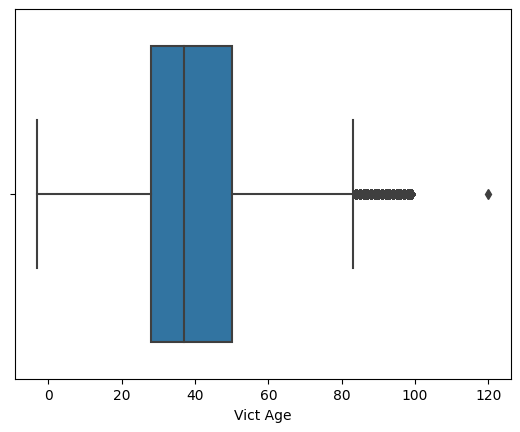

In [36]:
#handling outliers for age. removing ages 0 and below and
import seaborn as sns
sns.boxplot(data=df,x='Vict Age')


In [37]:
Q1 = df['Vict Age'].quantile(0.25)
Q3 = df['Vict Age'].quantile(0.75)
IQR = Q3 - Q1
#df_crimes['Vict Age'] has same quartile, but if we check again their is no age with value -2, -1, 0. So we can assume that to be a missing values, and for that case we can solve by :
#Remove missing values
#Replace values using mean or median data

df.loc[df['Vict Age'] <= 0, 'Vict Age'] = pd.NA
 # Replace missing or non-positive values with the calculated median
df['Vict Age'].fillna(df['Vict Age'].median(), inplace=True)
# delete this since it maybe outlier (just one record that have 120 years old with some missing information)
df = df[df['Vict Age'] < 110]
df['Vict Age'].describe()

count    822948.000000
mean         38.936544
std          13.571292
min           2.000000
25%          31.000000
50%          37.000000
75%          45.000000
max          99.000000
Name: Vict Age, dtype: float64

In [38]:
df.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
LAT               0
LON               0
dtype: int64

NO null values handled all and also removed outliers for age

In [39]:
#converting date types as necessary
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

**1. Overall Crime Trends:**

2022    234263
2021    207899
2020    198625
2023    182161
Name: Year, dtype: int64


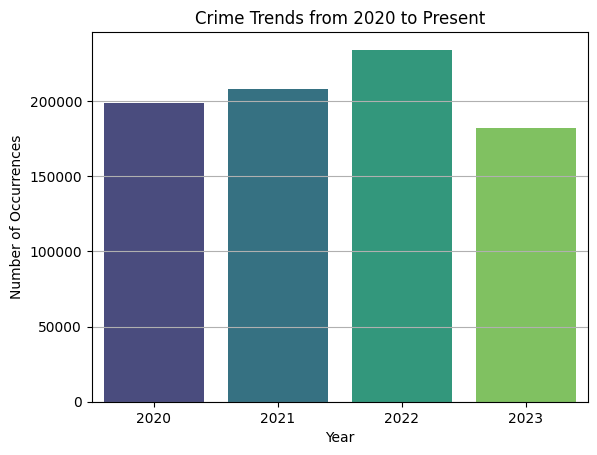

In [40]:
# Extract the year from the 'DATE OCC' column and count occurrences per year
df['Year'] = df['DATE OCC'].dt.year

print(df['Year'].value_counts())

sns.countplot(data=df, x='Year', palette='viridis')
plt.title('Crime Trends from 2020 to Present')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y')

plt.show()


**2. Seasonal Patterns:**

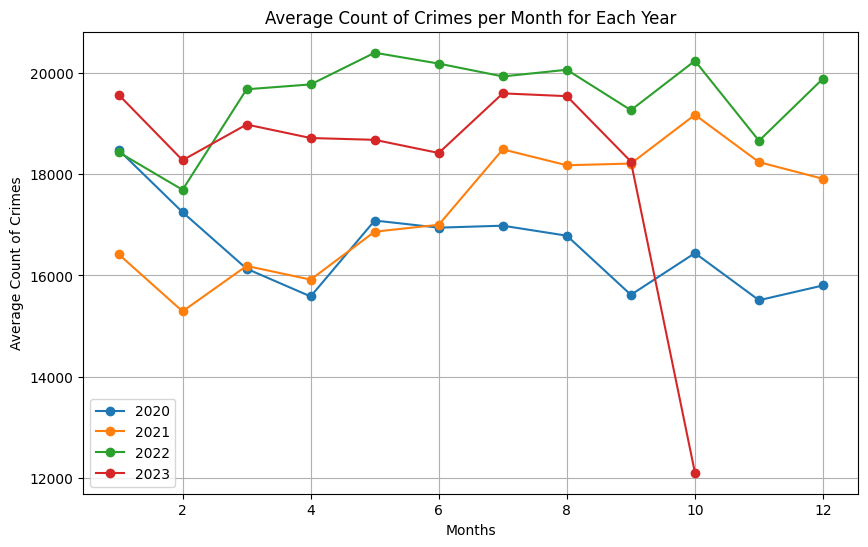

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by year and month and calculate value counts for each month
crime_counts_per_year_month = df.groupby([df['DATE OCC'].dt.year, df['DATE OCC'].dt.month]).size()

# Calculate the average count of crimes per month over the years
average_crime_count_per_year_month = crime_counts_per_year_month.groupby(level=[0, 1]).mean()
# Display the average count of crimes per month over the years

# Plotting line plots for each year with all months on the x-axis and average count on the y-axis
years = average_crime_count_per_year_month.index.get_level_values(0).unique()

plt.figure(figsize=(10, 6))
for year in years:
    year_data = average_crime_count_per_year_month.xs(year)
    plt.plot(year_data, label=str(year),marker='o')

plt.title('Average Count of Crimes per Month for Each Year')
plt.xlabel('Months')
plt.ylabel('Average Count of Crimes')
plt.legend()
plt.grid(True)
plt.show()

**3. Most Common Crime Type:**

In [42]:
crime_counts = df['Crm Cd Desc'].value_counts()
most_common_crime = crime_counts.idxmax()
highest_frequency = crime_counts.max()

print(f"The most common crime is '{most_common_crime}' with {highest_frequency} occurrences.")

The most common crime is 'VEHICLE - STOLEN' with 88289 occurrences.


**4. Regional Differences:**

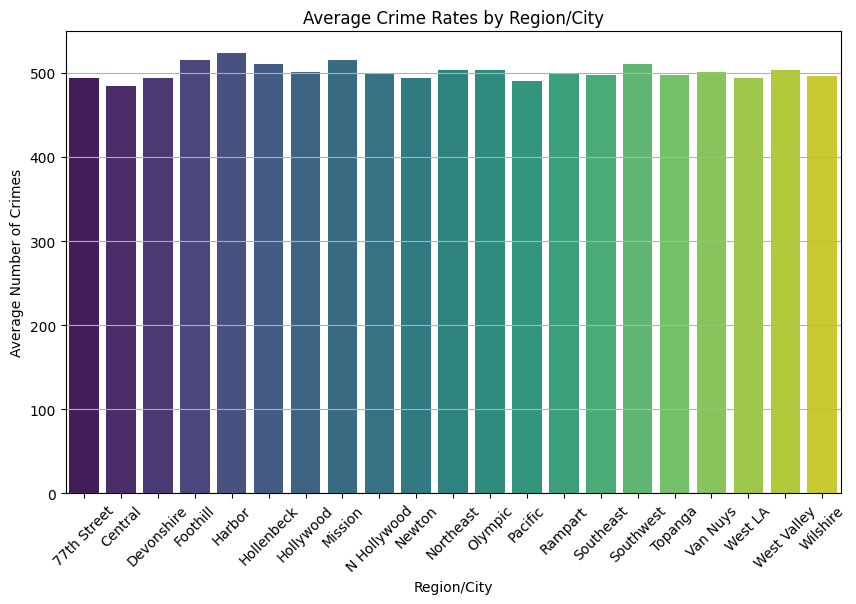

In [43]:
# Group data by Region/City and calculate descriptive statistics for crime rates
crime_rates_by_region = df.groupby('AREA NAME')['Crm Cd'].describe()

# Display the descriptive statistics for crime rates in different regions or cities
crime_rates_mean = df.groupby('AREA NAME')['Crm Cd'].mean().reset_index()
# Create a bar plot to compare mean crime rates between regions or cities
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_rates_mean, x='AREA NAME', y='Crm Cd', palette='viridis')
plt.title('Average Crime Rates by Region/City')
plt.xlabel('Region/City')
plt.ylabel('Average Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**5. Correlation with Economic Factors:**

        Date  Inflation        GDP
0 2020-01-31   1.158281  21.082626
1 2020-02-29   1.089769  21.055570
2 2020-03-31   2.699245  21.532596
3 2020-04-30   1.460282  19.361905
4 2020-05-31   2.009978  20.050141


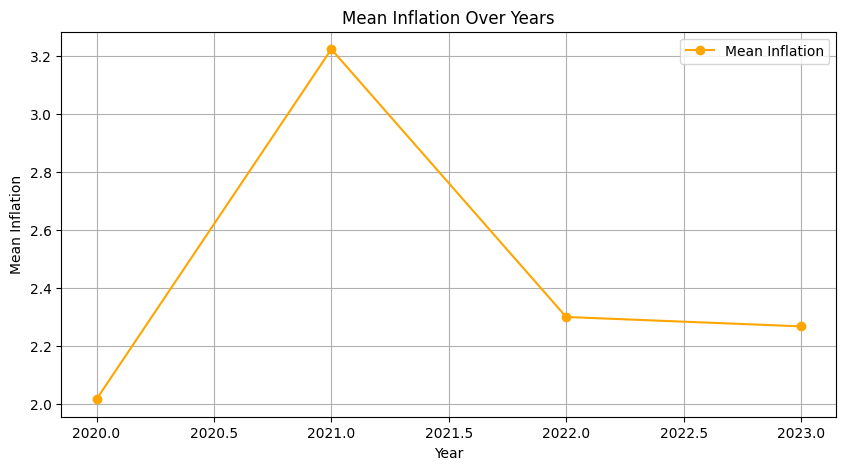

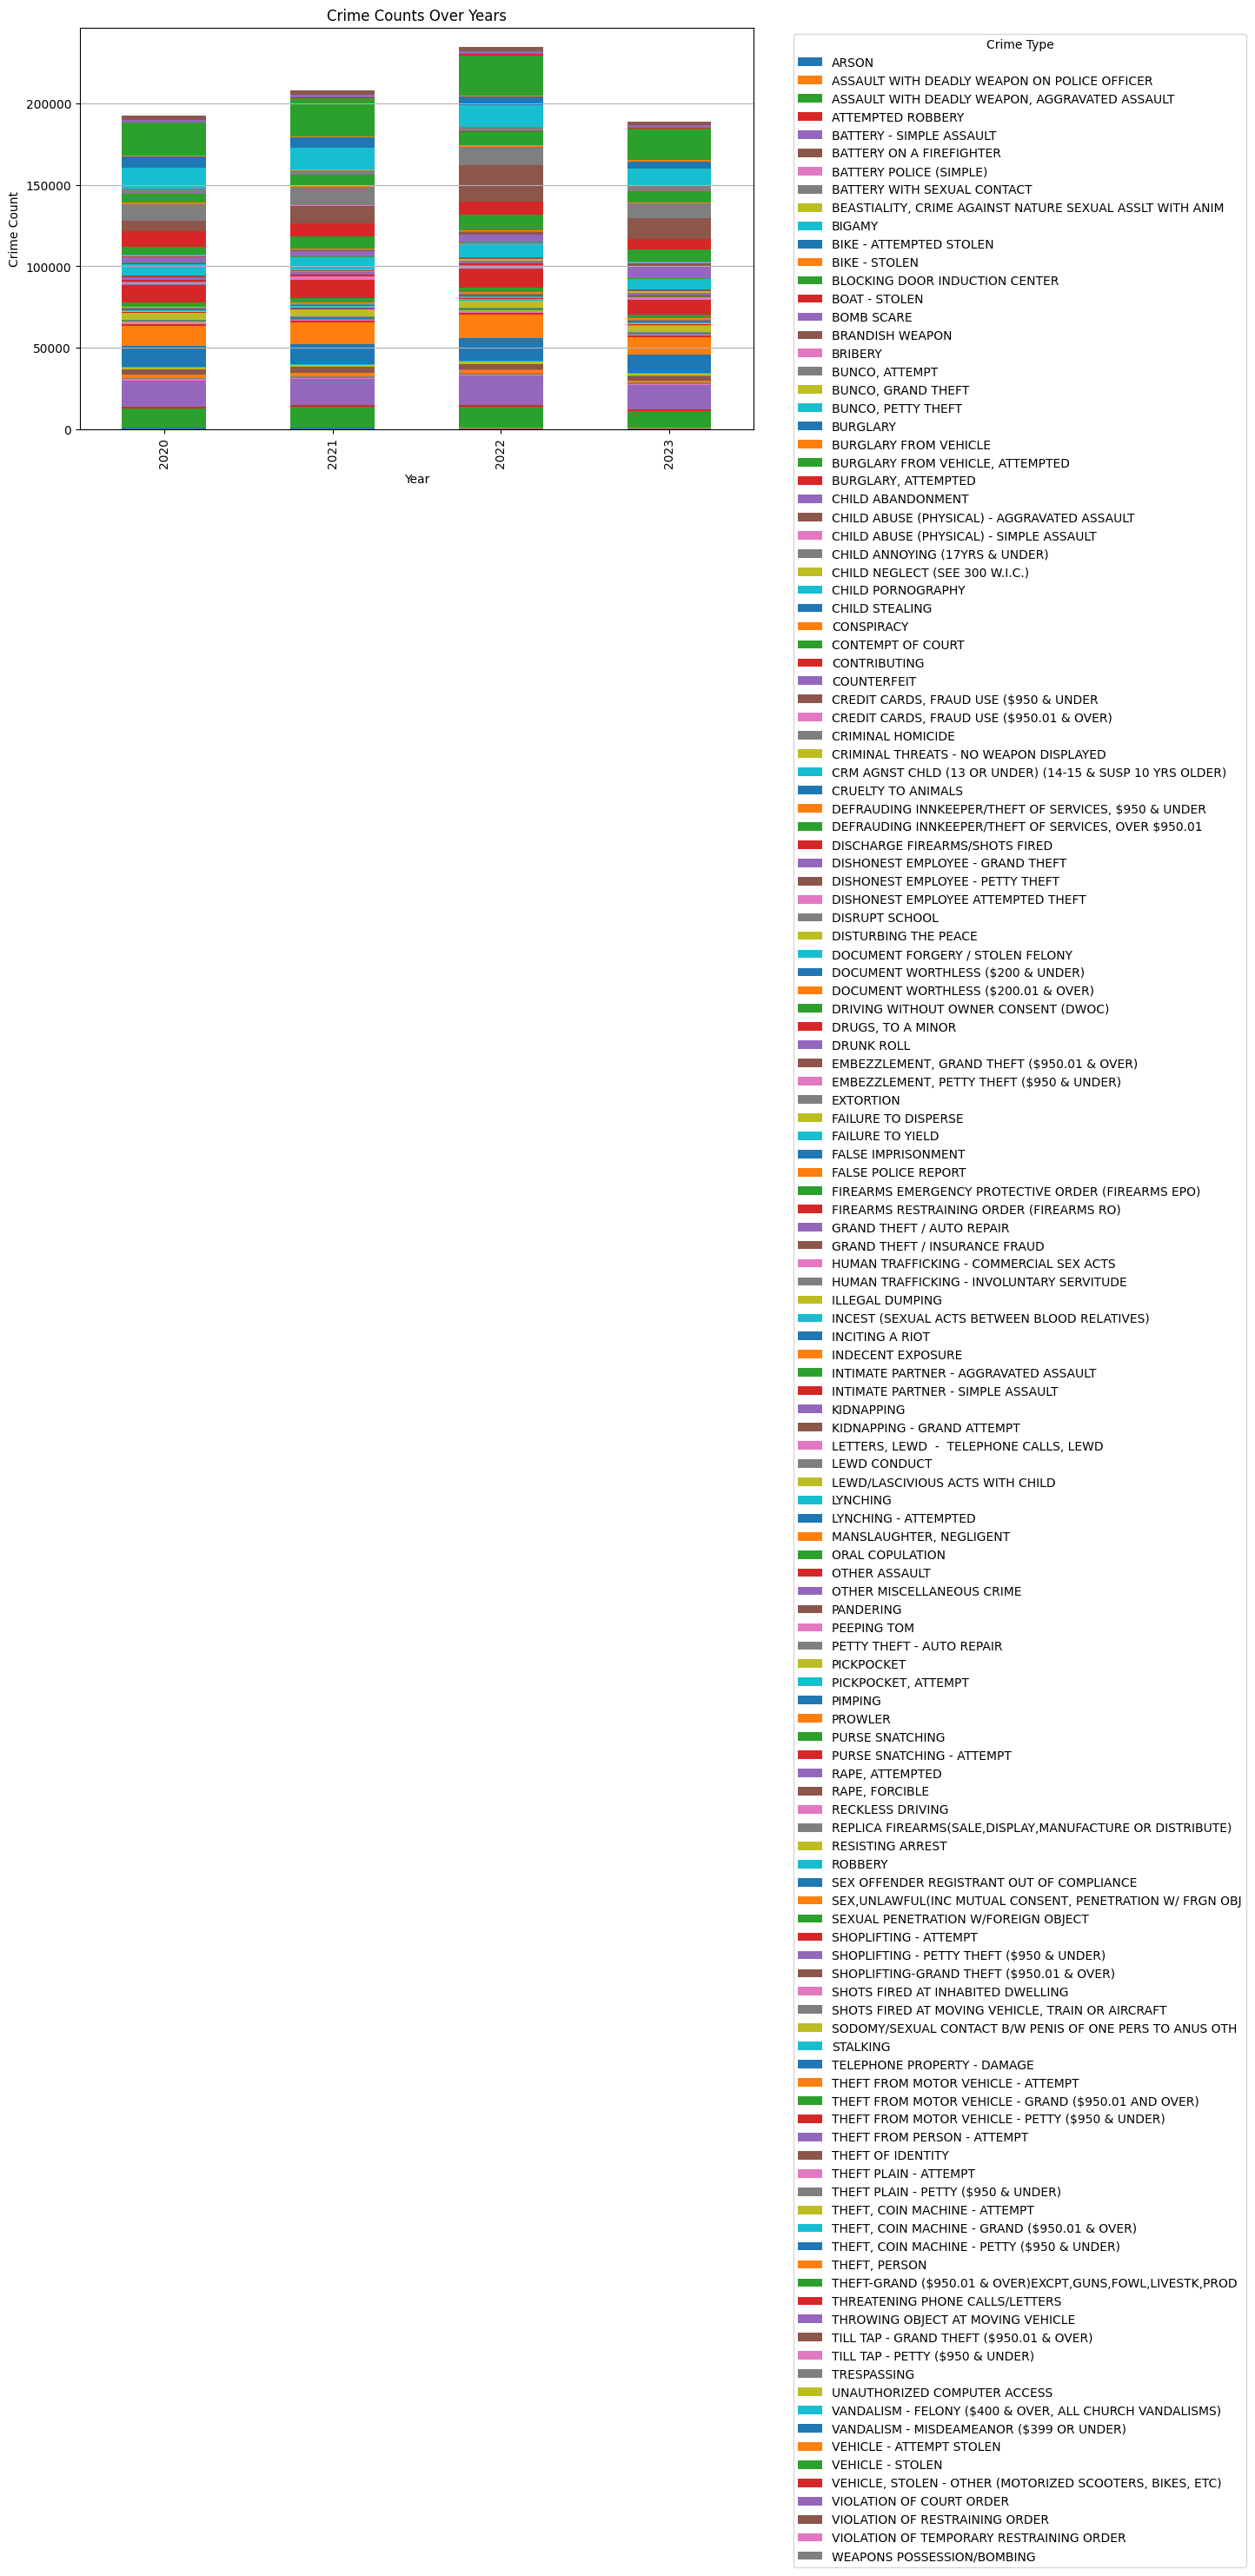

Correlation between Inflation and Crime Rates: -0.00


In [88]:

 #Generating date range from 2020 to 2023
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='M')

# Generating random economic data for four years
economic_data = pd.DataFrame({
    'Date': date_range,
    'Inflation': np.random.uniform(1, 4, len(date_range)),  # Random inflation values (assumed range)
    'GDP': np.random.uniform(19, 22, len(date_range))  # Random GDP values (assumed range)
})

# Display a snippet of the economic dataset
print(economic_data.head())
crime_data = pd.read_csv('/content/Crime_Data_from_2020_to_Present (1).csv')

# Convert 'Date Rptd' to datetime by handling AM/PM
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Drop rows with NaT (Not a Time) values
# Sort the 'Date Rptd' column in crime_data
crime_data = crime_data.sort_values('Date Rptd')

# Sort the 'Date' column in economic_data
economic_data = economic_data.sort_values('Date')

# Merging the datasets based on the closest dates (round to the nearest month for merging)
merged_data = pd.merge_asof(crime_data, economic_data, left_on='Date Rptd', right_on='Date')

# Grouping the merged data by year and calculating the mean inflation and total counts for each year
yearly_data = merged_data.groupby(merged_data['Date Rptd'].dt.year)
inflation_mean = yearly_data['Inflation'].mean()
crime_counts = yearly_data['Crm Cd Desc'].value_counts()

# Reshape crime count data to a dataframe
crime_counts_df = crime_counts.unstack(fill_value=0)

# Plotting the inflation over the years
plt.figure(figsize=(10, 5))
plt.plot(inflation_mean.index, inflation_mean.values, marker='o', label='Mean Inflation', color='orange')
plt.title('Mean Inflation Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Inflation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the counts of different crimes over the years
crime_counts_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Crime Counts Over Years')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()
# Calculate correlation between inflation and crime rates
correlation = merged_data['Inflation'].corr(merged_data['Crm Cd'])

print(f"Correlation between Inflation and Crime Rates: {correlation:.2f}")



**6**. **Day of the** **Week** **Analysis**:



Monday       116598
Tuesday      112839
Wednesday    116818
Thursday     116124
Friday       125521
Saturday     120264
Sunday       114784
Name: Day of Week, dtype: int64


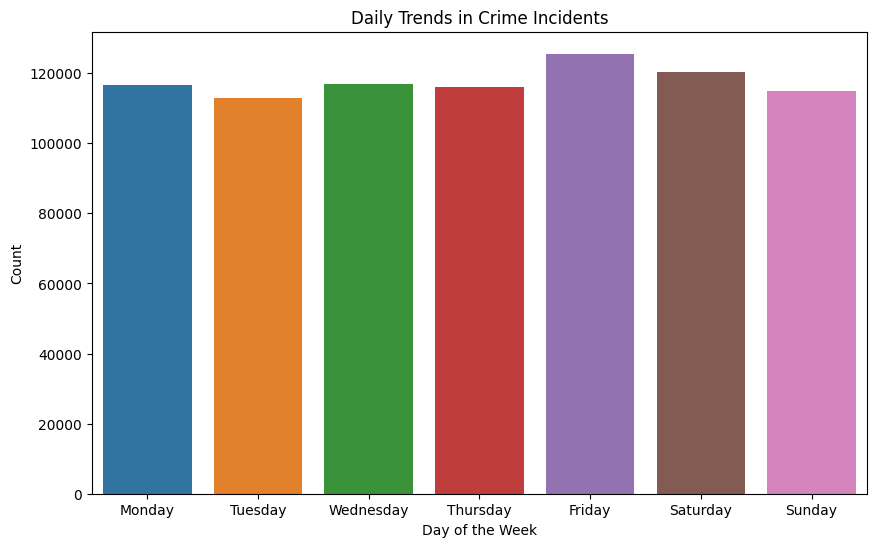

In [47]:
df['Day of Week'] = df['DATE OCC'].dt.day_name()
daily_counts = df['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_counts.index, y=daily_counts.values)
print(daily_counts)
plt.title('Daily Trends in Crime Incidents')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

**7. Impact of Major Events:**

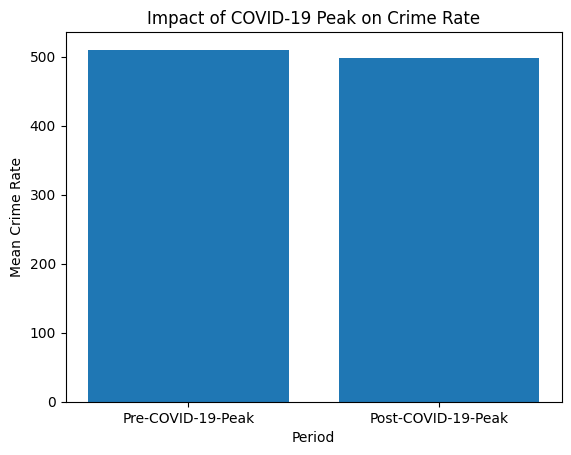

Mean crime rate before the COVID-19 peak: 510.16
Mean crime rate after the COVID-19 peak: 497.54
Percentage change: -2.47%


In [48]:
# Sort the data by date
df = df.sort_values(by='DATE OCC')

# Define the date of the peak of COVID-19 cases
covid_peak_date = pd.to_datetime("2020-12-01")  # Replace this date with the actual COVID-19 peak date

# Create subsets for pre-COVID-19-peak and post-COVID-19-peak data
pre_covid_peak_data = df[df['DATE OCC'] < covid_peak_date]
post_covid_peak_data = df[df['DATE OCC'] >= covid_peak_date]

# Calculate crime rates for pre-COVID-19-peak and post-COVID-19-peak periods
pre_covid_peak_crime_rate = pre_covid_peak_data['Crm Cd'].mean()
post_covid_peak_crime_rate = post_covid_peak_data['Crm Cd'].mean()

# Create a bar chart to visualize the change
plt.bar(['Pre-COVID-19-Peak', 'Post-COVID-19-Peak'], [pre_covid_peak_crime_rate, post_covid_peak_crime_rate])
plt.xlabel('Period')
plt.ylabel('Mean Crime Rate')
plt.title('Impact of COVID-19 Peak on Crime Rate')
plt.show()

# Calculate the percentage change
percentage_change_covid = ((post_covid_peak_crime_rate - pre_covid_peak_crime_rate) / pre_covid_peak_crime_rate) * 100

print(f"Mean crime rate before the COVID-19 peak: {pre_covid_peak_crime_rate:.2f}")
print(f"Mean crime rate after the COVID-19 peak: {post_covid_peak_crime_rate:.2f}")
print(f"Percentage change: {percentage_change_covid:.2f}%")


**8. Outliers and Anomalies:**

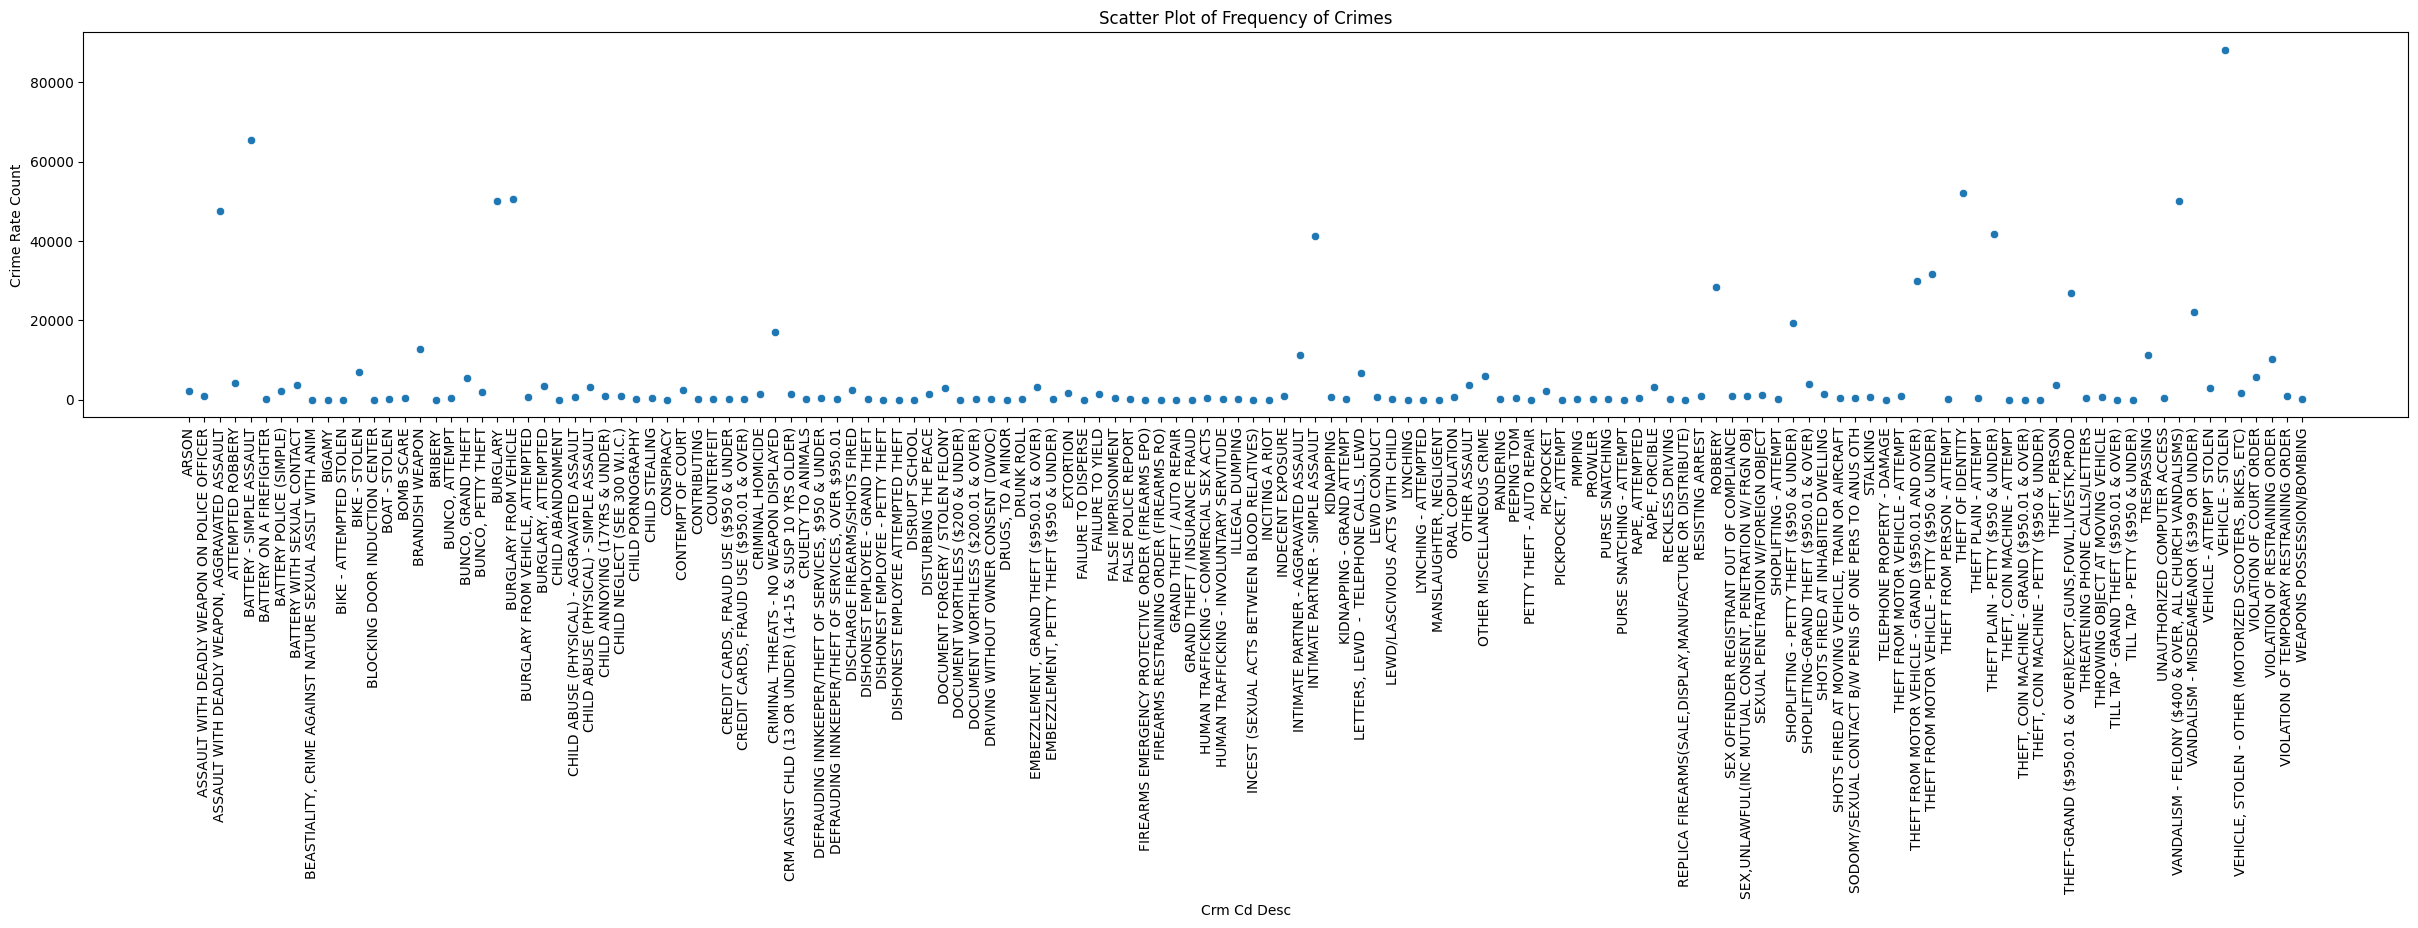

In [79]:
#here we are analyzing outliers for crm cd description
import seaborn as sns

df_crimefreq = df.groupby(['Crm Cd Desc']).size()

fig, ax = plt.subplots(figsize=(30,5))
sns.scatterplot(data = df_crimefreq)
plt.title('Scatter Plot of Frequency of Crimes')
plt.xticks(rotation = 90)
plt.ylabel('Crime Rate Count')
plt.show()

In [80]:
# Calculate quantiles
quantile_1 = np.percentile(df_crimefreq, 25)
quantile_3 = np.percentile(df_crimefreq, 75)

# Get IQR
iqr = quantile_3 - quantile_1

# Create a threshold for the outlier formula
threshold = 1.5 * iqr

# Get indices of outliers
outliers = np.where((df_crimefreq < quantile_1 - threshold) | (df_crimefreq > quantile_3 + threshold))

# Print the exact crimes that are considered outliers based on statistical methods
print(df_crimefreq.iloc[outliers])

Crm Cd Desc
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              47468
BATTERY - SIMPLE ASSAULT                                    65372
BRANDISH WEAPON                                             12795
BURGLARY                                                    50213
BURGLARY FROM VEHICLE                                       50560
CRIMINAL THREATS - NO WEAPON DISPLAYED                      17094
INTIMATE PARTNER - AGGRAVATED ASSAULT                       11233
INTIMATE PARTNER - SIMPLE ASSAULT                           41346
ROBBERY                                                     28312
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    19315
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         29847
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             31805
THEFT OF IDENTITY                                           52111
THEFT PLAIN - PETTY ($950 & UNDER)                          41832
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    2681

**9. Demographic Factors:**

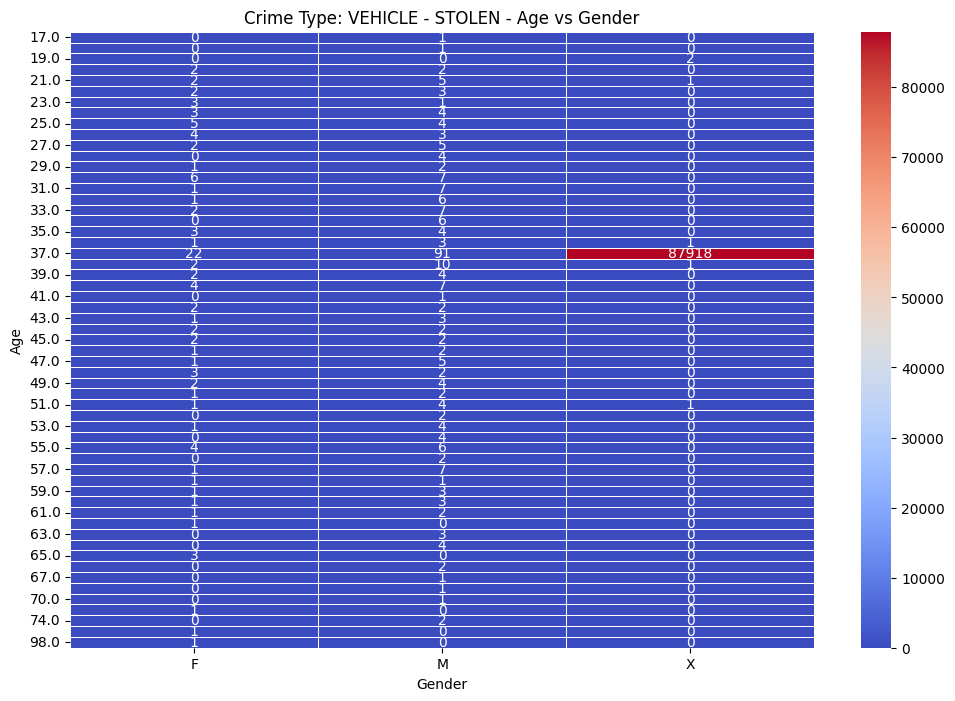

In [81]:
import seaborn as sns  # Ensure you import seaborn for enhanced visualization

# Group the data by 'Vict Age', 'Vict Sex', and 'Crm Cd Desc'
grouped_data = df.groupby(['Vict Age', 'Vict Sex', 'Crm Cd Desc']).size().reset_index(name='Count')

# Filter for a specific crime type (e.g., 'Robbery', 'Assault')
specific_crime = grouped_data[grouped_data['Crm Cd Desc'] == 'VEHICLE - STOLEN']  # Replace 'Robbery' with the desired crime type

# Plotting a heatmap to visualize the correlation
pivot_table = specific_crime.pivot_table(values='Count', index='Vict Age', columns='Vict Sex', fill_value=0)
# Set up a larger heatmap figure size for better visibility
plt.figure(figsize=(12, 8))

# Use a color map for better visualization
plt.title('Crime Type: VEHICLE - STOLEN - Age vs Gender')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g', linewidths=.5)

plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


In [82]:
print(grouped_data.corr())

          Vict Age    Count
Vict Age   1.00000 -0.01968
Count     -0.01968  1.00000


<ipython-input-82-eb9d8c0b1f47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(grouped_data.corr())


**10. Predicting Future Trends:**

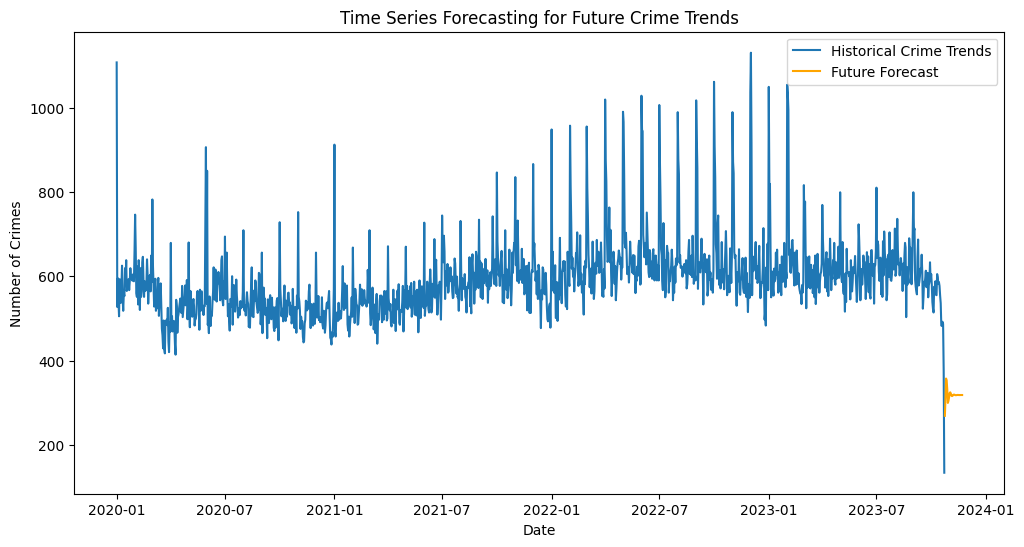

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure 'DATE OCC' is already in the datetime format before resampling
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Resampling daily and calculating the total number of crimes per day
crime_series = df.resample('D', on='DATE OCC').size()

# Fitting the ARIMA model
model = ARIMA(crime_series, order=(5, 1, 0))
model_fit = model.fit()

# Forecasting future crimes for the next 30 days
future_forecast = model_fit.forecast(steps=30)

# Plotting the historical and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(crime_series, label='Historical Crime Trends')
plt.plot(pd.date_range(start=crime_series.index.max(), periods=31)[1:], future_forecast, label='Future Forecast', color='orange')
plt.title('Time Series Forecasting for Future Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()
